<a href="https://colab.research.google.com/github/GodstimeEdet/RiceLeafCNNPrediction/blob/main/RiceLeafCNNPrediction_Godstime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
!nvidia-smi

Mon Aug 21 05:36:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#import matplotlib.pyplot as plt



In [ ]:


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/rice/train'
valid_path = '/content/drive/MyDrive/rice/test'



In [ ]:


# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False


In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/rice/train/*')



In [ ]:
folders

['/content/drive/MyDrive/rice/train/Brown spot',
 '/content/drive/MyDrive/rice/train/Leaf smut',
 '/content/drive/MyDrive/rice/train/Bacterial_leaf_blight']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)



In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)



In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/rice/train',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

Found 119 images belonging to 3 classes.


In [ ]:


test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/rice/test',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')



Found 15 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/10
6/6 [==============================] - 12s 1s/step - loss: 0.0122 - accuracy: 0.9916 - val_loss: 1.9899e-05 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 3s 523ms/step - loss: 0.0119 - accuracy: 0.9916 - val_loss: 2.2173e-06 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 4s 650ms/step - loss: 2.1215e-04 - accuracy: 1.0000 - val_loss: 1.6769e-06 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 3s 514ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 3.5208e-05 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 3s 523ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.3215e-04 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 3s 510ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.3795e-04 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 4s 577ms/step - loss: 3.2785e-04 - accuracy: 1.0000 - val_loss: 7.2937e-05 - val_acc

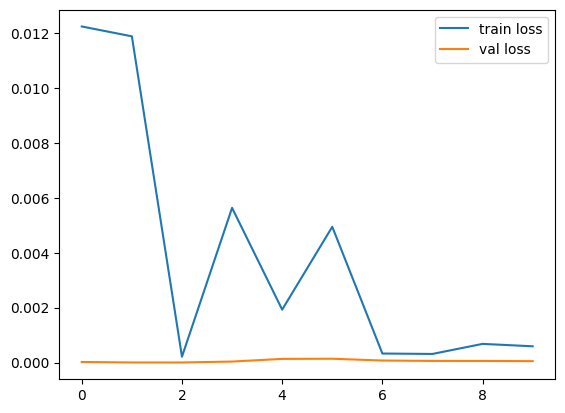

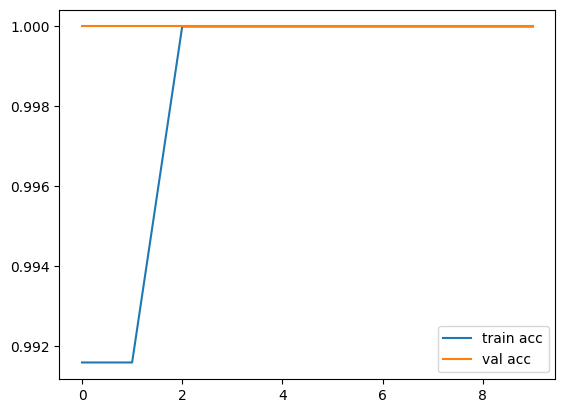

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [ ]:
model.save("/content/drive/MyDrive/rice/model_inception_14.h5")

In [ ]:

from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.models import load_model

import numpy as np

# Load the trained model
model = load_model("/content/drive/MyDrive/rice/model_inception_14.h5")

# Load the image
img = load_img("/content/drive/MyDrive/rice/Validation/Leaf_smut_2.jpg")

# Resize the image to the desired input size
x = img_to_array(img.resize([224, 224]))

# Expand dimensions to match the expected input shape of the model (1, 150, 150, 3)
x = np.expand_dims(x, axis=0)

# Replace 'model' with the name of your trained model variable
predictions = model.predict(x)

# Get the predicted class index (0, 1, or 2) with the highest probability
predicted_class_index = np.argmax(predictions)

# Map the class index to class labels (modify as per your class labels)
class_labels = ["Bacteral leaf blight", "brown spot", "leaf smut"]
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 1s 1s/step
Predicted Class: leaf smut
